In [1]:
# Importing the main library
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Reading the csv dataset file 
data = pd.read_csv('911.csv')

In [3]:
# print the top 5 rows of the dataset
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
# describing the dataset 
data.describe()

,lat,lng,zip,e
count,423909.000000,423909.000000,371780.000000,423909.0
mean,40.158618,-75.314022,19234.732269,1.0
std,0.129170,0.656048,301.388898,0.0
min,0.000000,-119.698206,3366.000000,1.0
25%,40.099784,-75.391547,19038.000000,1.0
50%,40.143900,-75.304563,19401.000000,1.0
75%,40.229008,-75.210760,19446.000000,1.0
max,51.335390,87.854975,77316.000000,1.0


In [5]:
# Converting the data type of the dataset
dtype={'lat':str,'lng':str,'desc':str,'zip':str,'title':str,'timeStamp':str,'twp':str,'addr':str,'e':int}

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [7]:
# Calculating the null values 
data.isnull().sum()

lat              0
lng              0
desc             0
zip          52129
title            0
timeStamp        0
twp            159
addr             0
e                0
dtype: int64

# Data Cleaning 
* Removing the null values
* droping non usefull columns or dummy cols:



In [8]:
data.zip.fillna(np.mean(data.zip),inplace=True)

In [ ]:
del data["e"]

In [ ]:
data.isnull().sum()

In [9]:
# Details of the the columns in the dataset
data.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

# How many different types of calls

In [10]:
# Using the title column we have differentiate the types of calls.
# Title is the category of the call
data["title"].value_counts()

Traffic: VEHICLE ACCIDENT -             98401
Traffic: DISABLED VEHICLE -             31871
Fire: FIRE ALARM                        24380
EMS: FALL VICTIM                        21253
EMS: RESPIRATORY EMERGENCY              21158
EMS: CARDIAC EMERGENCY                  20616
EMS: VEHICLE ACCIDENT                   16928
Traffic: ROAD OBSTRUCTION -             14134
EMS: SUBJECT IN PAIN                    12001
EMS: HEAD INJURY                        11102
EMS: UNKNOWN MEDICAL EMERGENCY           7170
Fire: VEHICLE ACCIDENT                   7153
EMS: SYNCOPAL EPISODE                    7085
EMS: GENERAL WEAKNESS                    7069
EMS: SEIZURES                            6946
EMS: ALTERED MENTAL STATUS               6184
EMS: MEDICAL ALERT ALARM                 6017
Fire: FIRE INVESTIGATION                 5955
EMS: ABDOMINAL PAINS                     5802
EMS: UNCONSCIOUS SUBJECT                 5373
EMS: HEMORRHAGING                        5264
EMS: OVERDOSE                     

# Creating a columns with reason: 
The title column have the general reason for the call with the more detailed reason for the the call.
There are three basic category for the call like 
* EMS
* Fire
* Traffic

In [11]:
data['Reason']=data['title'].apply(lambda x:x.split(':')[0])
x=data['Reason'].unique()
x

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [12]:
data['Reason'].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: Reason, dtype: int64

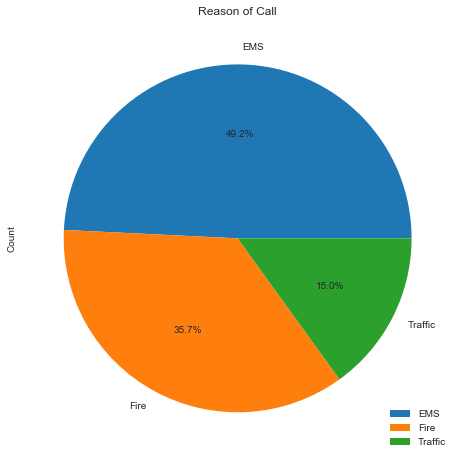

In [13]:
plt.figure(figsize=(18,8))
plt.pie(data['Reason'].value_counts(),autopct='%1.1f%%',labels=x)
plt.title('Reason of Call')
plt.ylabel('Count')
plt.legend()
plt.show()

In [14]:
data['timeStamp']=pd.to_datetime(data['timeStamp'])
type(data.timeStamp.iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

# Extract the date and time regarding the calls

In [16]:
data['Date']=data.timeStamp.dt.date
data['Time']=data.timeStamp.dt.time
data['Hour']=data.timeStamp.dt.hour
data['DayOfWeek']=data.timeStamp.dt.weekday
data['Month']=data.timeStamp.dt.month
data['Year']=data.timeStamp.dt.year

In [21]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
mmap={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
data['Month']=data['Month'].map(mmap)
data['DayOfWeek']=data['DayOfWeek'].map(dmap)

In [26]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Time,Hour,Month,DayOfWeek,Year,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.000000,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10,17,Dec,Thu,2015,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.000000,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10,17,Dec,Thu,2015,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.000000,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10,14,Dec,Thu,2015,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.000000,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10,16,Dec,Thu,2015,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,19234.732269,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10,16,Dec,Thu,2015,2015-12-10


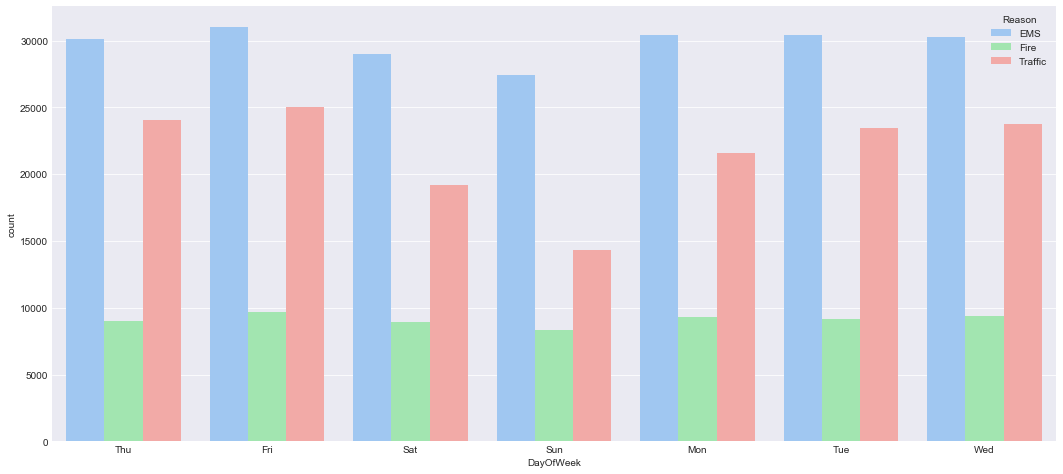

In [43]:

sns.set_style('darkgrid')
plt.figure(figsize=(18,8))
f2=sns.countplot(x='DayOfWeek',data=data,hue='Reason',palette="pastel")

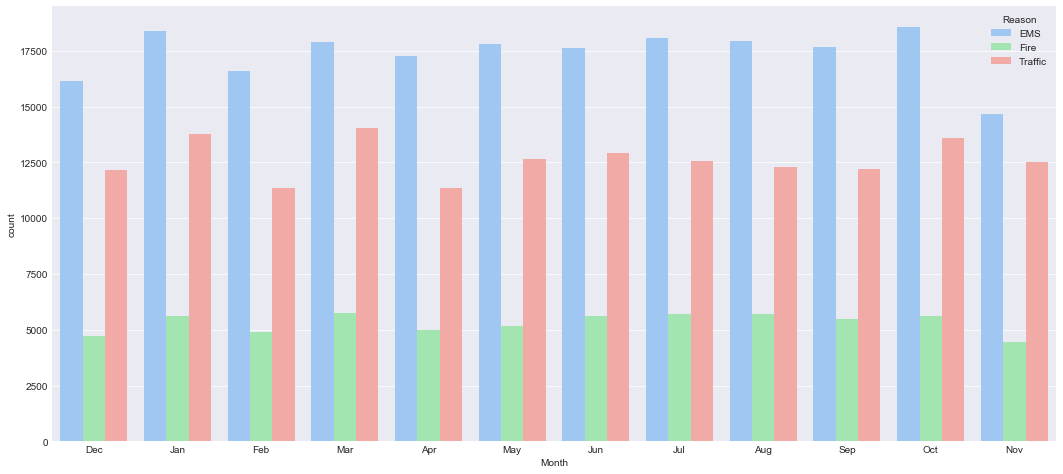

In [44]:
sns.set_style('darkgrid')
plt.figure(figsize=(18,8))
f2=sns.countplot(x='Month',data=data,hue='Reason',palette="pastel")

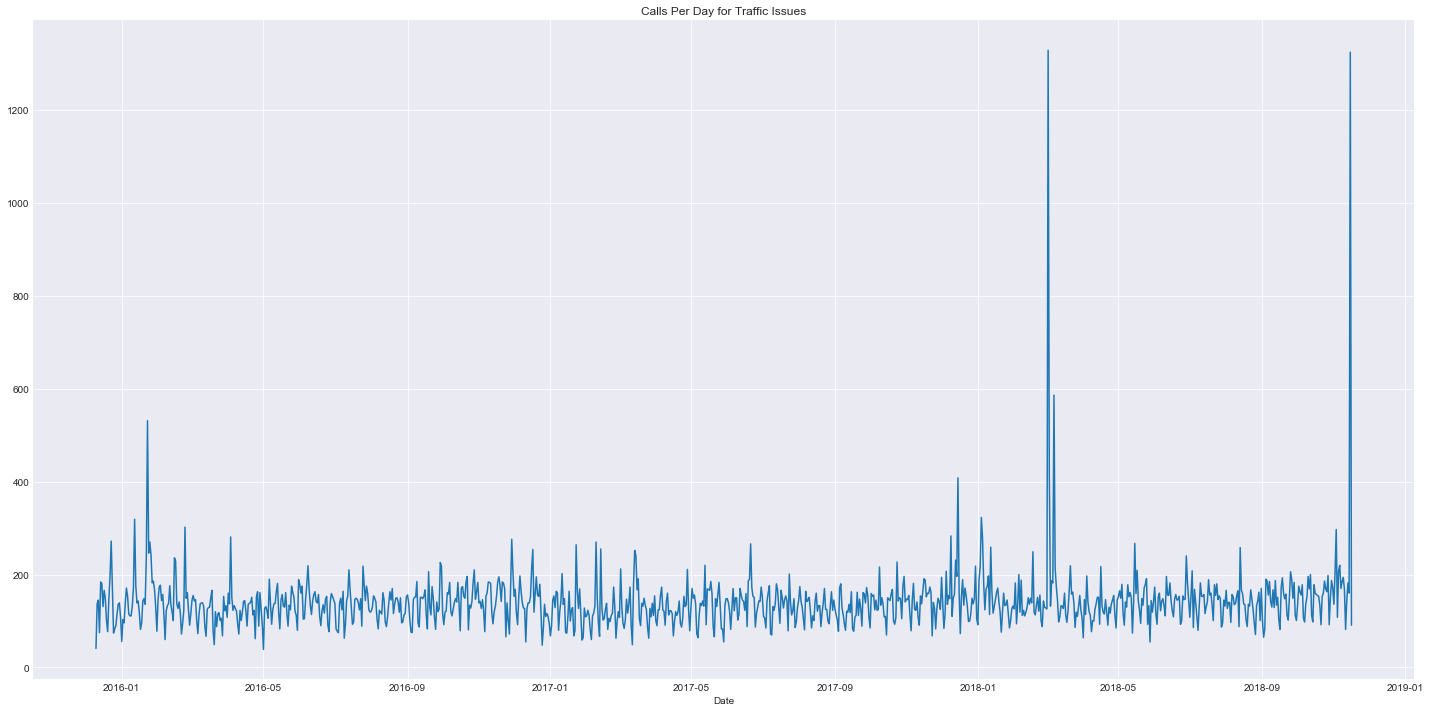

In [25]:
plt.figure(figsize=(20,10))
data[data['Reason']=='Traffic'].groupby('Date').count()['lat'].plot();
plt.title('Calls Per Day for Traffic Issues');
plt.tight_layout()

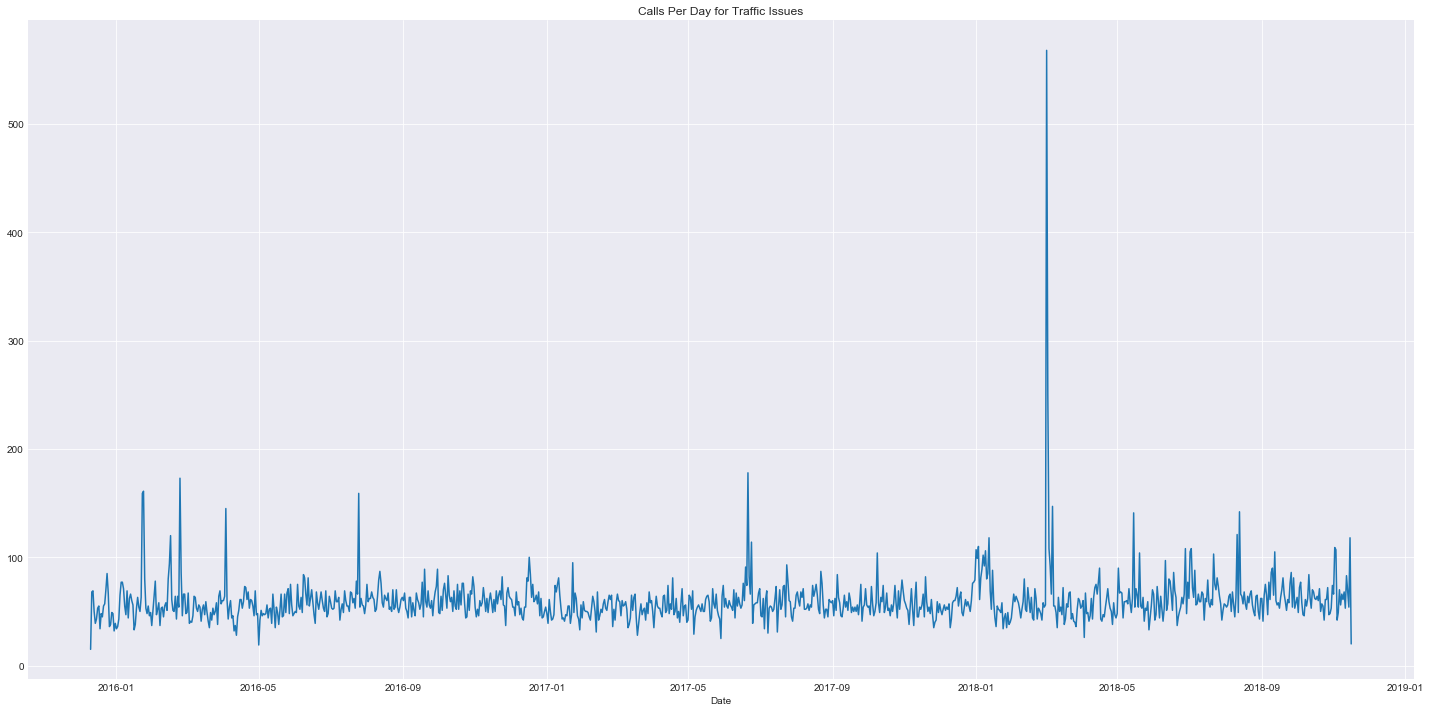

In [28]:
plt.figure(figsize=(20,10))
data[data['Reason']=='Fire'].groupby('Date').count()['lat'].plot();
plt.title('Calls Per Day for Fire Issues');
plt.tight_layout()

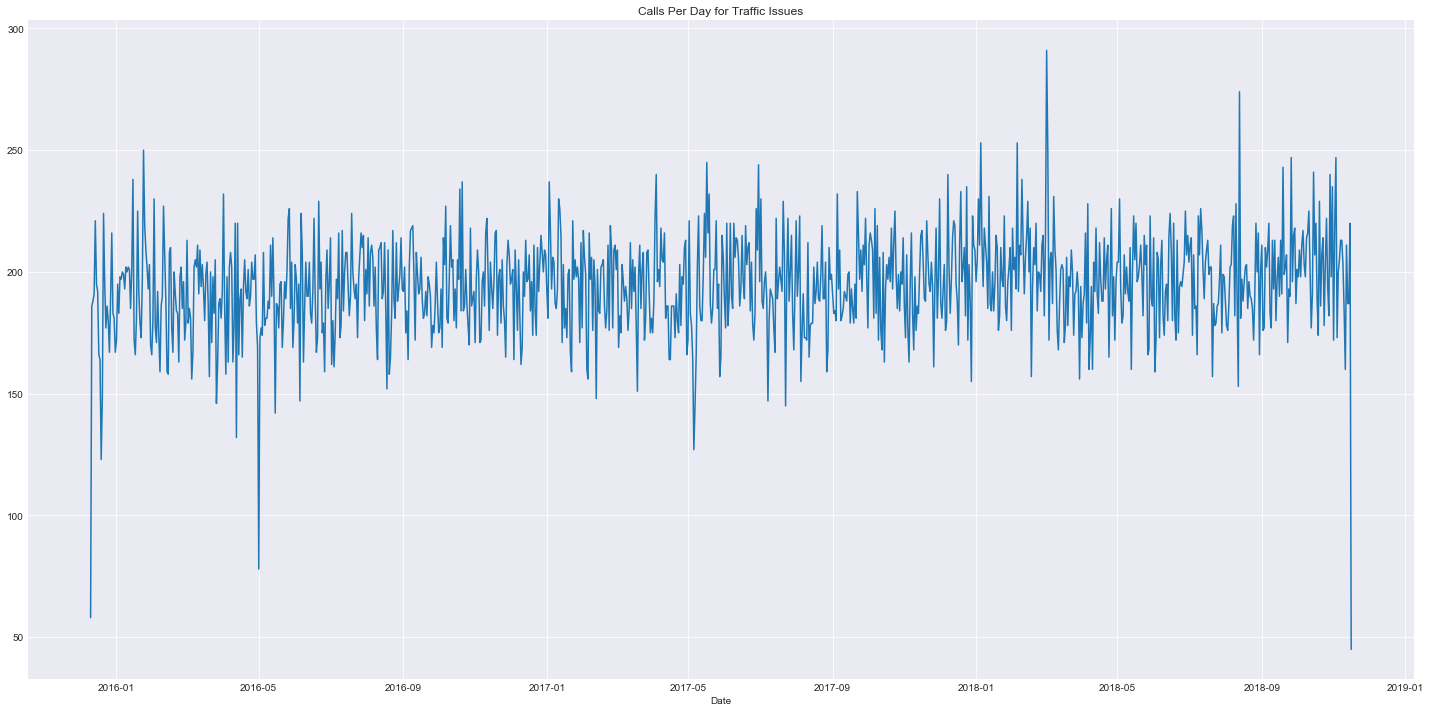

In [29]:
plt.figure(figsize=(20,10))
data[data['Reason']=='EMS'].groupby('Date').count()['lat'].plot();
plt.title('Calls Per Day for EMS Issues');
plt.tight_layout()

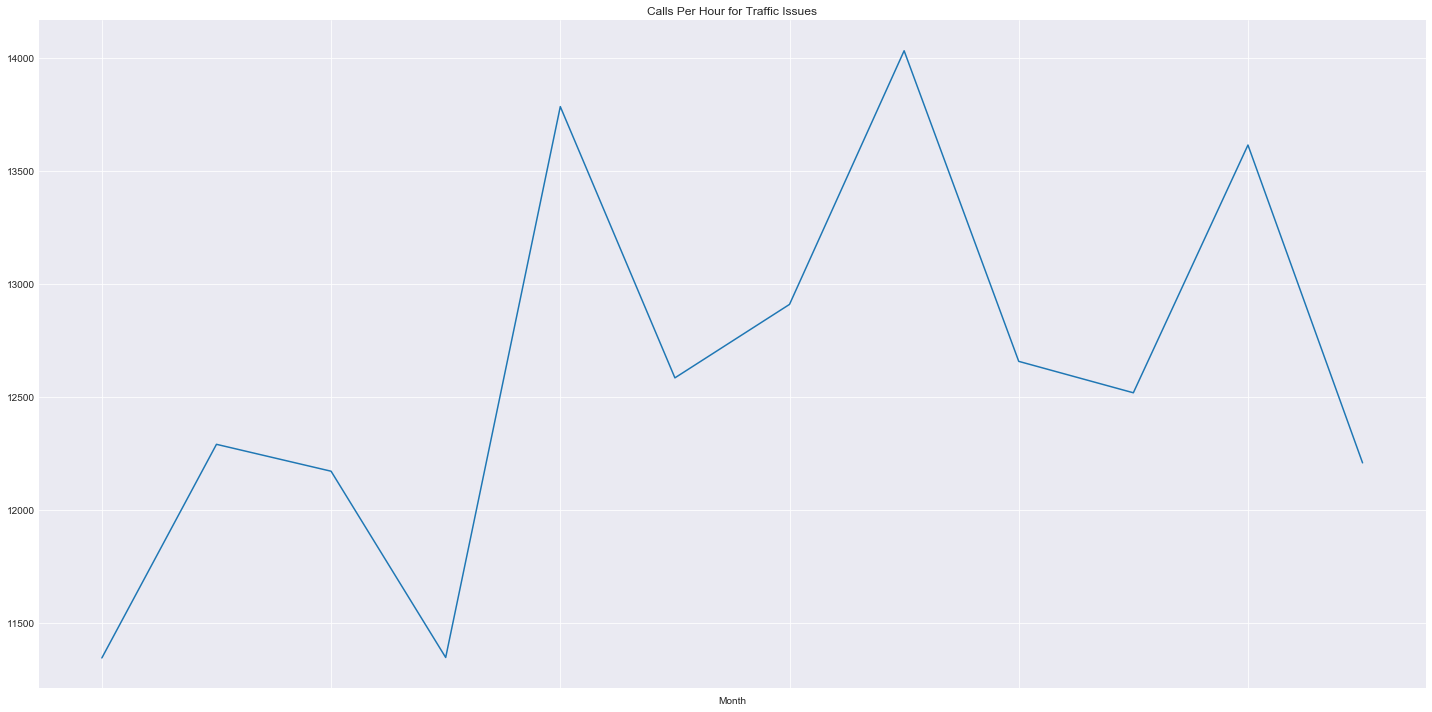

In [37]:
plt.figure(figsize=(20,10))
data[data['Reason']=='Traffic'].groupby('Month').count()['lat'].plot();
plt.title('Calls Per Hour for Traffic Issues');
plt.tight_layout()

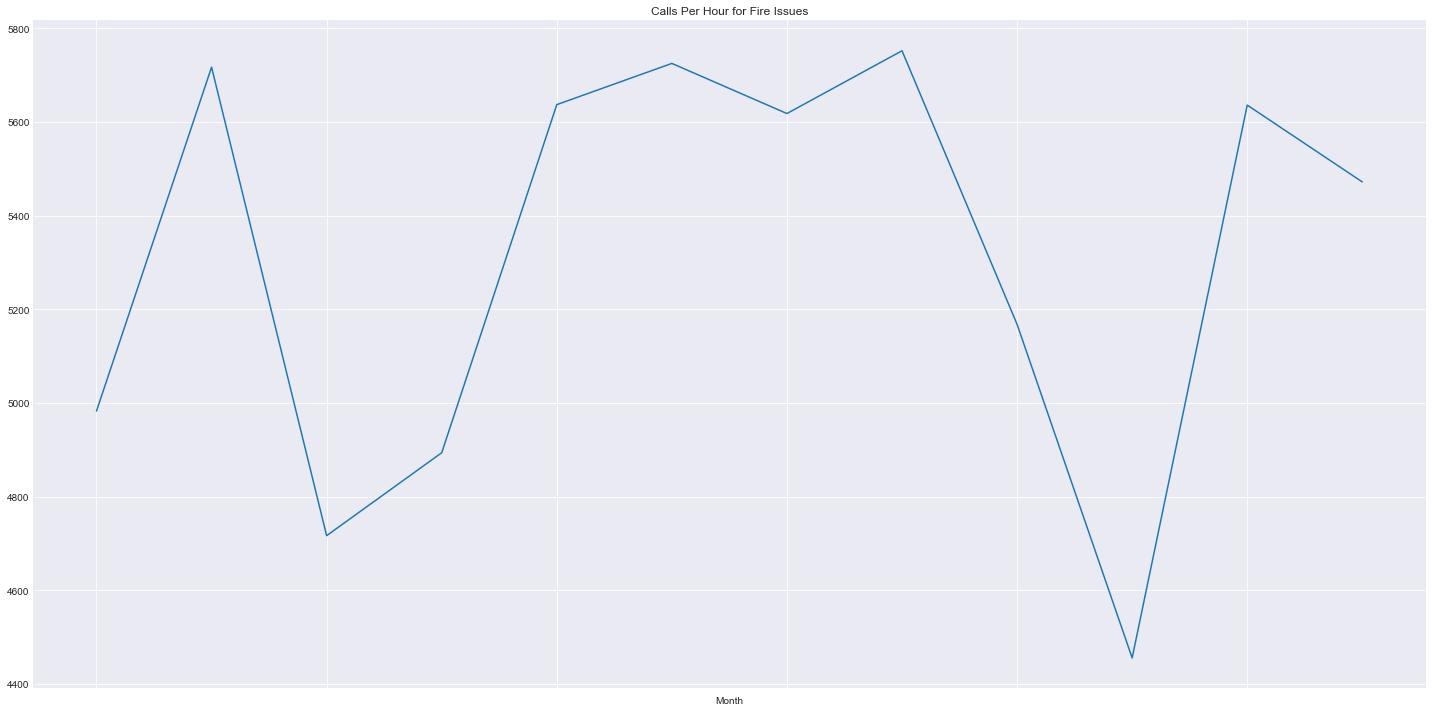

In [38]:
plt.figure(figsize=(20,10))
data[data['Reason']=='Fire'].groupby('Month').count()['lat'].plot();
plt.title('Calls Per Hour for Fire Issues');
plt.tight_layout()

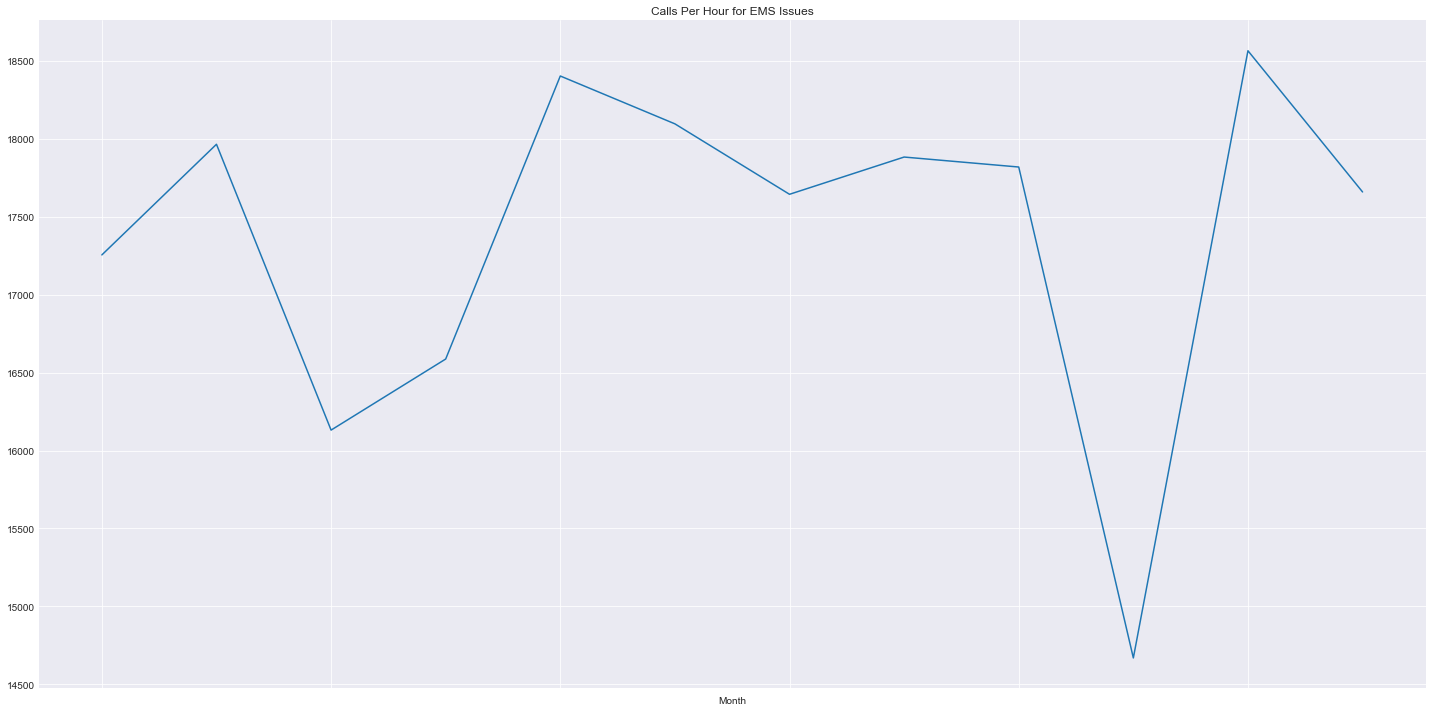

In [39]:
plt.figure(figsize=(20,10))
data[data['Reason']=='EMS'].groupby('Month').count()['lat'].plot();
plt.title('Calls Per Hour for EMS Issues');
plt.tight_layout()

# At what time of day/month I can expect which type of call.
* Calls between day/months
* most calls in day
* most calls in which month of the year

In [30]:
dayHour=data.groupby(by=['DayOfWeek','Hour']).count()['Reason'].unstack()

<Figure size 864x432 with 0 Axes>

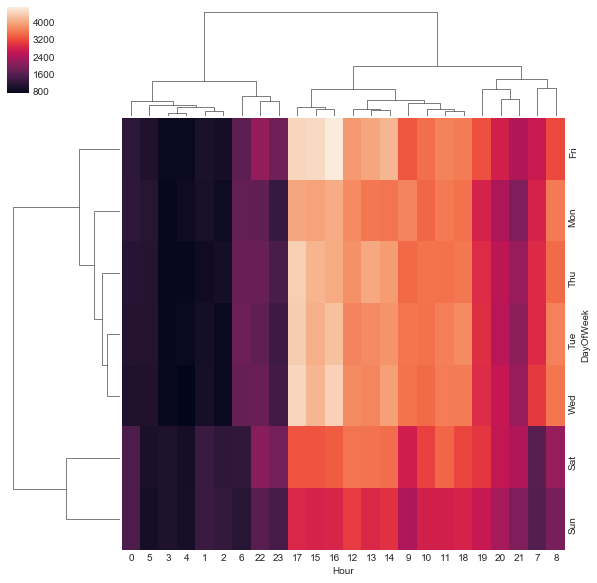

In [42]:
plt.figure(figsize=(12,6));
sns.clustermap(dayHour);

* We can see that weekend has the less no of calls than the rest of the days and the time is between the 15-17 hours.


<Figure size 864x432 with 0 Axes>

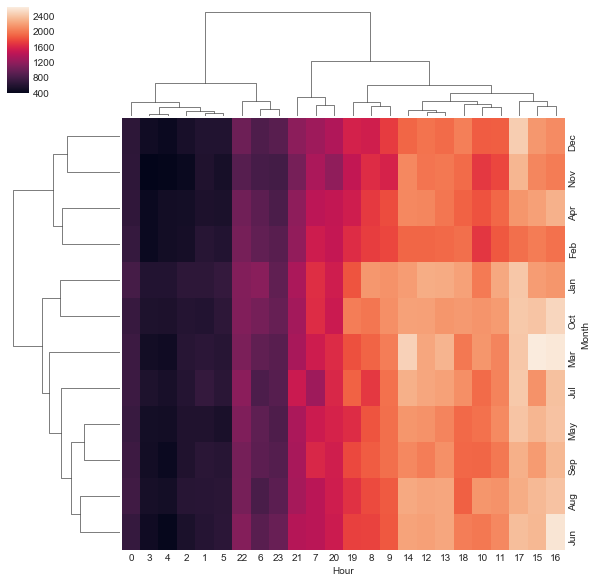

In [41]:
Month_hour=data.groupby(by=['Month','Hour']).count()['Reason'].unstack()
plt.figure(figsize=(12,6));
sns.clustermap(Month_hour);